# Europaparliamentswahl 2024 in Freiburg

Hier verfolge und analysiere ich die Europaparliamentswahlergbnisse aus Freiburg im Breisgau. 

In [1]:

import numpy as np
import pandas as pd
import scipy as sp
import os
from matplotlib import pyplot as plt
import json
#import plotly.express as px
#import plotly.graph_objects as go
import geopandas 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')
from functions_wahl import *

In [2]:
#Daten bekommen und kombinieren mit geografischen und statistischen Stadtdaten 
#get_and_save_eur() %nicht mehr noetog da entgueltige version vorhanden
Stadtteile,Stadtbezirke=process_geo()
gesamt,comb2,wahl_bezirke=get_process_wahl(wahl='Europa')
joined=Stadtbezirke.join(comb2)

Wahlbezirke 247
ausgezaehlte Wahlbezirke 247


## Gesamtergebnis

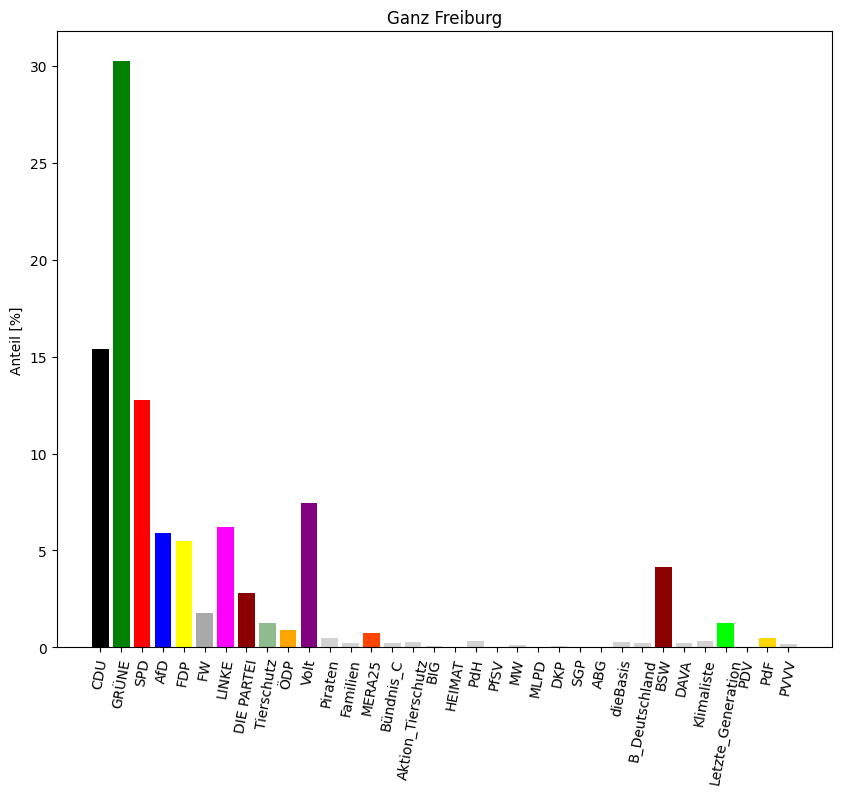

In [3]:
make_bar_plot(gesamt,title='Ganz Freiburg',Wahl='Europa')

Whenn das Europaparliament nur aus Freiburg kaeme. 

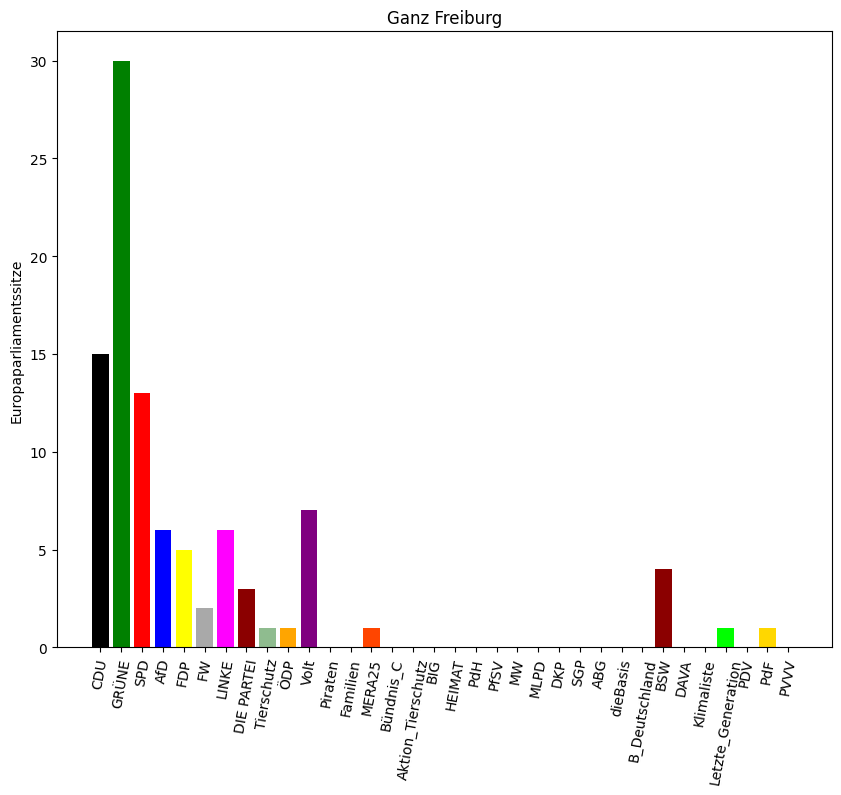

In [4]:
make_bar_plot(gesamt,title='Ganz Freiburg',Wahl='Europa',sitze=96)

Im Freiburgparliament haette die Ampel genau die Haelfte der Stimmen, koennte aber wohl zusmamen mit einer kleinen Partei regieren. 

Mehr Sizte das Deutschlandweit haben Gruene, LINKE, die Partei, Volt, Mera25 und letzte Genartion. 
Weniger haben Union, SPD (nur einer), AfD, FDP (nur einer), FW, BSW und Familie. 


Nun Karten mit Parteianteil fuer Parteien die ins Freiburg Parliament kaemen und fuer die Bundesweit 2019 groessten Partein auch Gewinne und Verluste. 

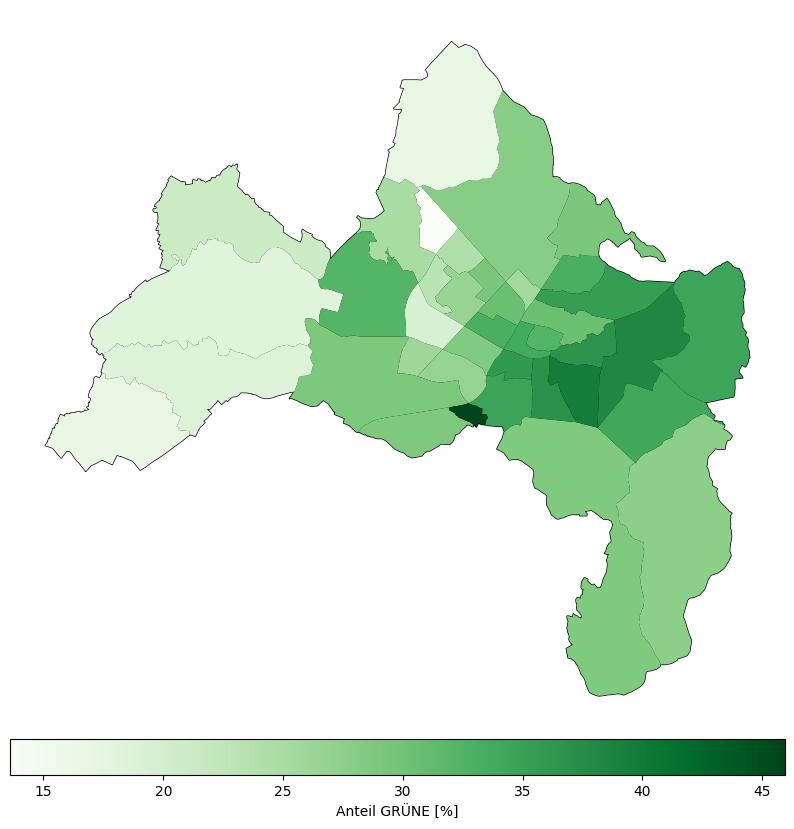

In [27]:
karte_stadtbezirke(joined,'GRÜNE',wahl='Europa')

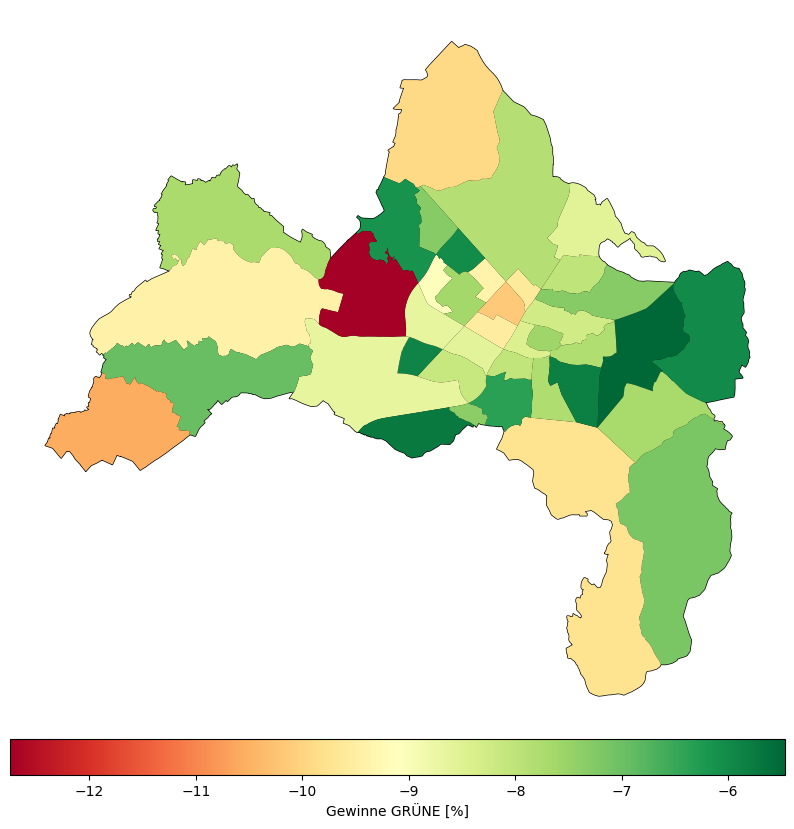

In [28]:
karte_stadtbezirke(joined,'Gewinne_GRÜNE',wahl='Europa')

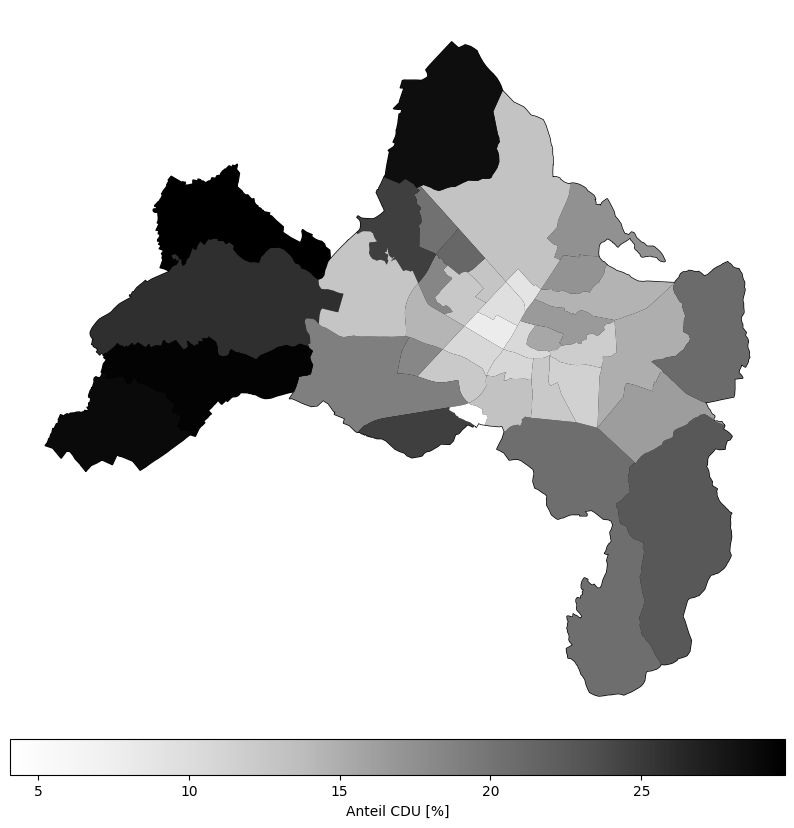

In [29]:
karte_stadtbezirke(joined,'CDU',wahl='Europa')

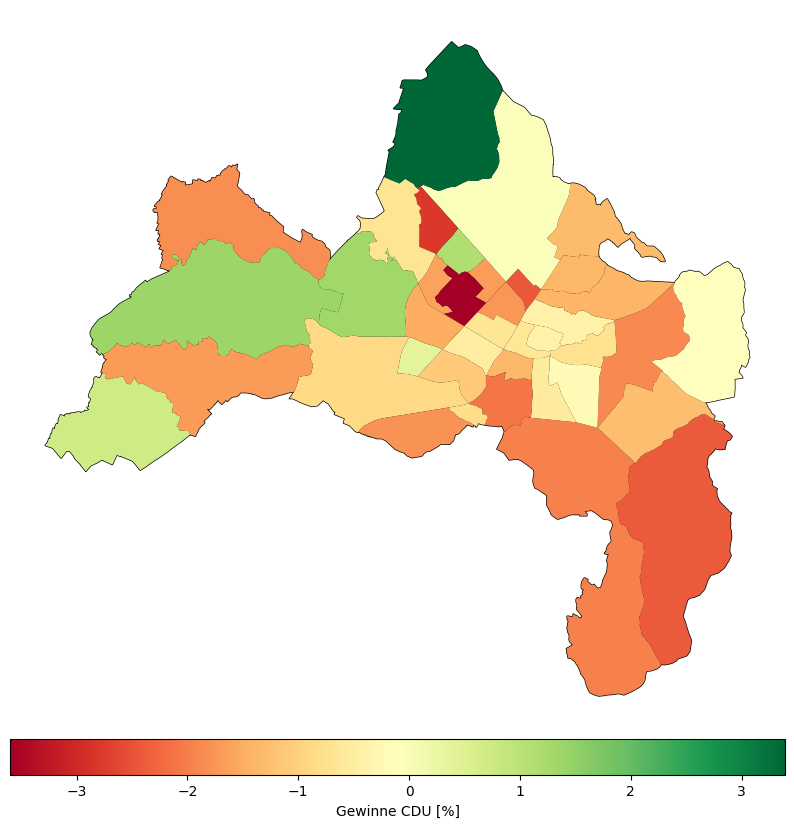

In [30]:
karte_stadtbezirke(joined,'Gewinne_CDU')

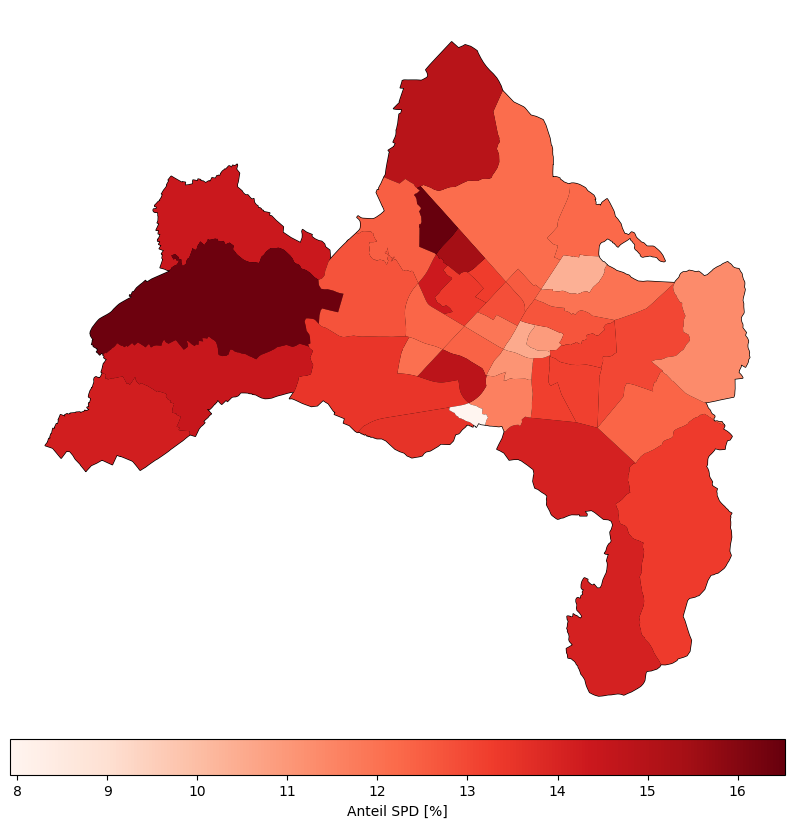

In [31]:
karte_stadtbezirke(joined,'SPD',wahl='Europa')

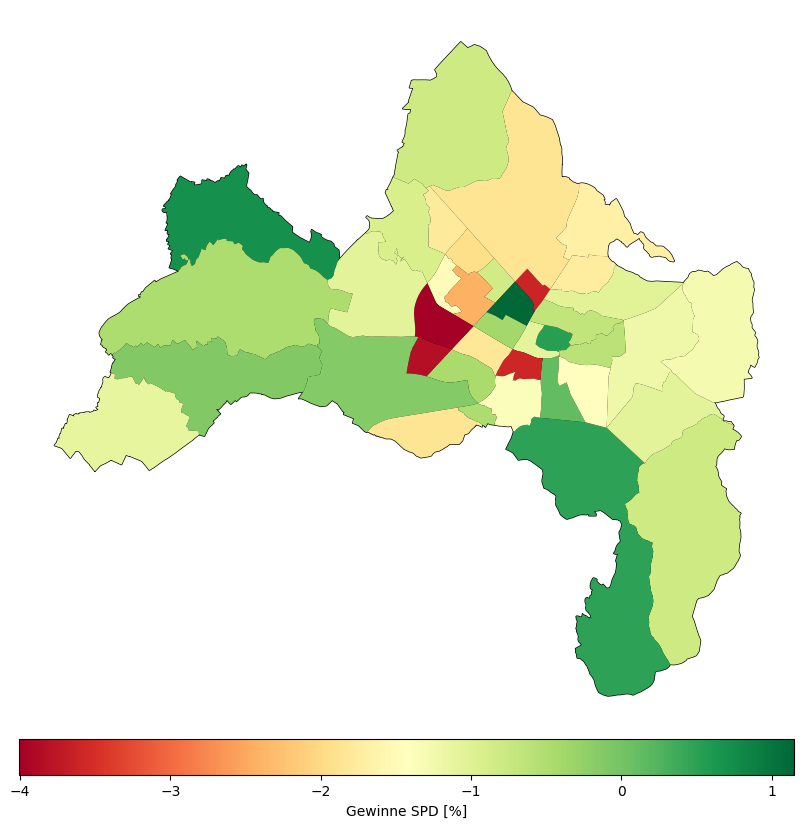

In [32]:
karte_stadtbezirke(joined,'Gewinne_SPD',wahl='Europa')

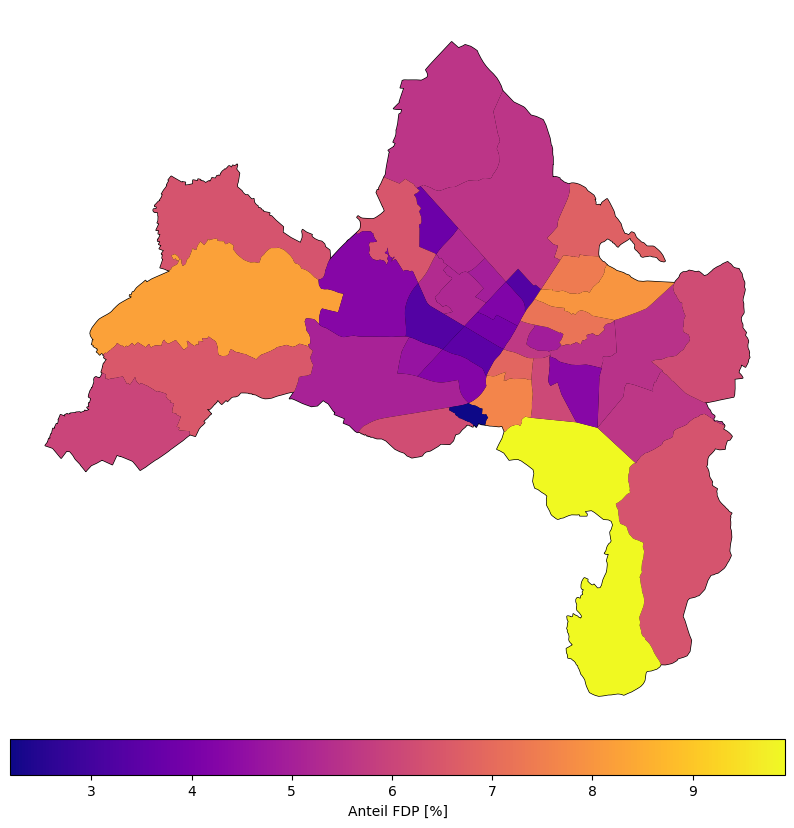

In [33]:
karte_stadtbezirke(joined,'FDP',wahl='Europa')

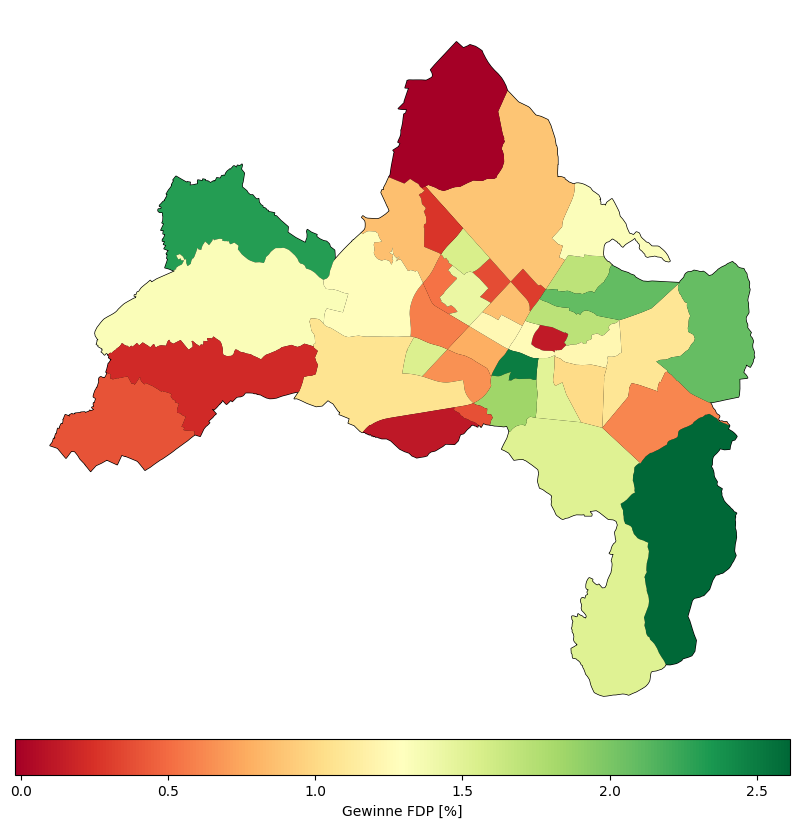

In [34]:
karte_stadtbezirke(joined,'Gewinne_FDP',wahl='Europa')

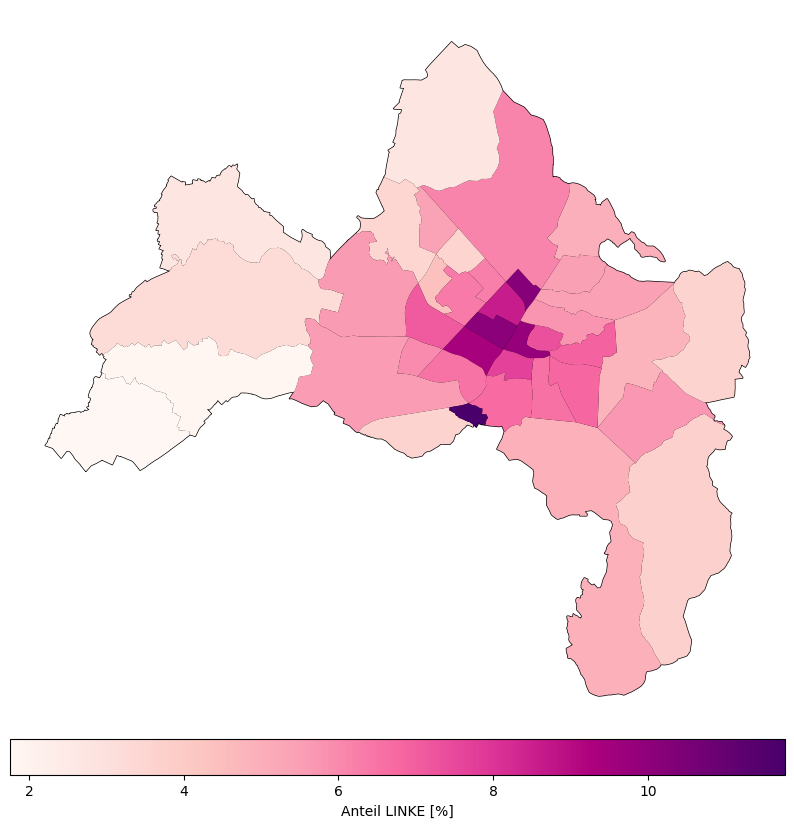

In [35]:
karte_stadtbezirke(joined,'LINKE',wahl='Europa')

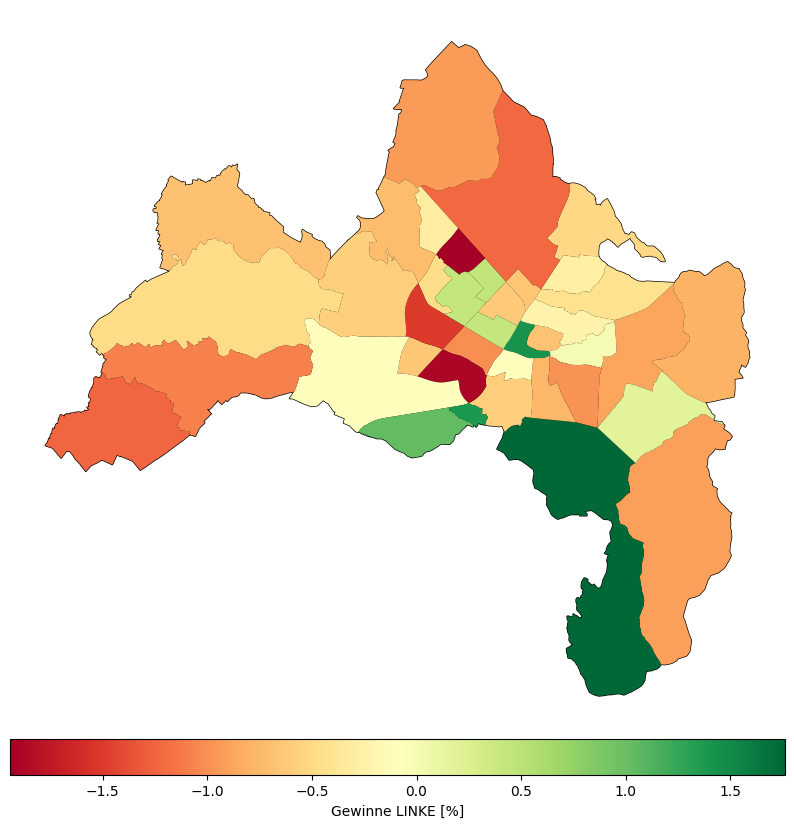

In [36]:
karte_stadtbezirke(joined,'Gewinne_LINKE',wahl='Europa')

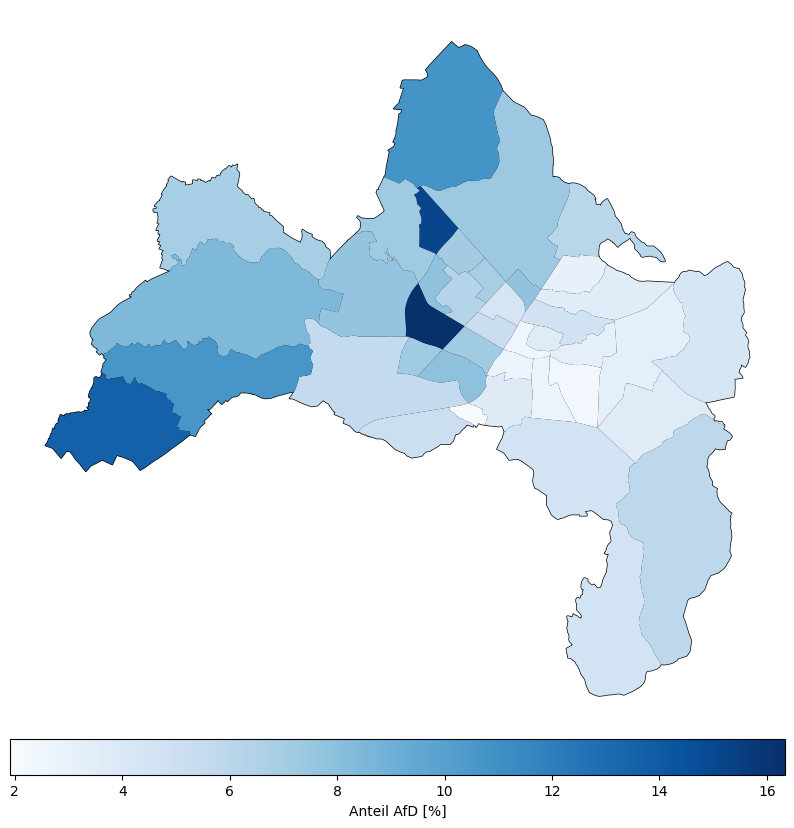

In [37]:
karte_stadtbezirke(joined,'AfD',wahl='Europa')

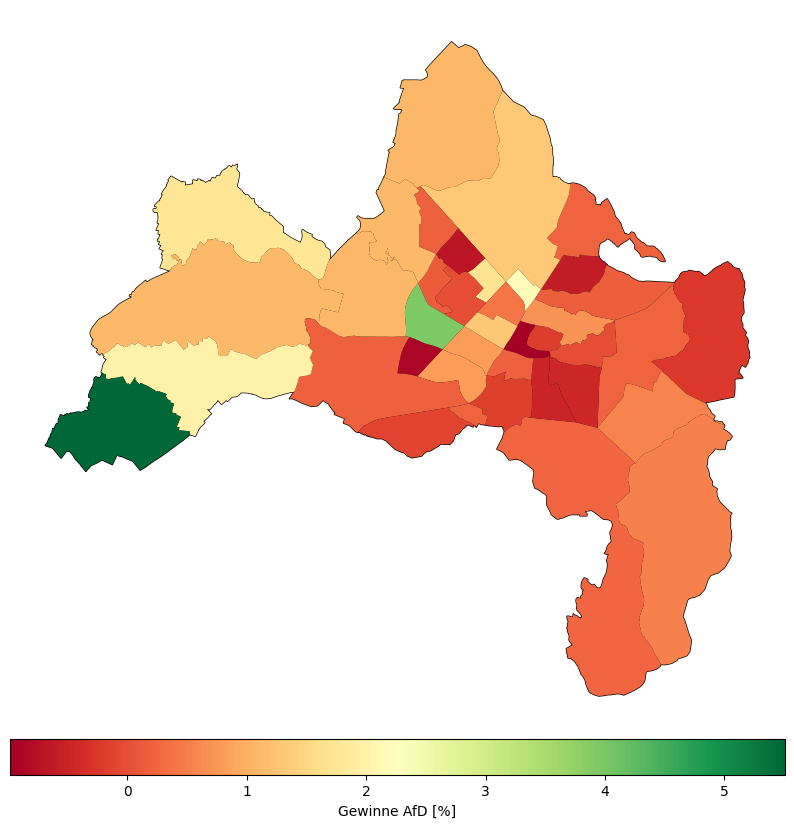

In [38]:
karte_stadtbezirke(joined,'Gewinne_AfD',wahl='Europa')

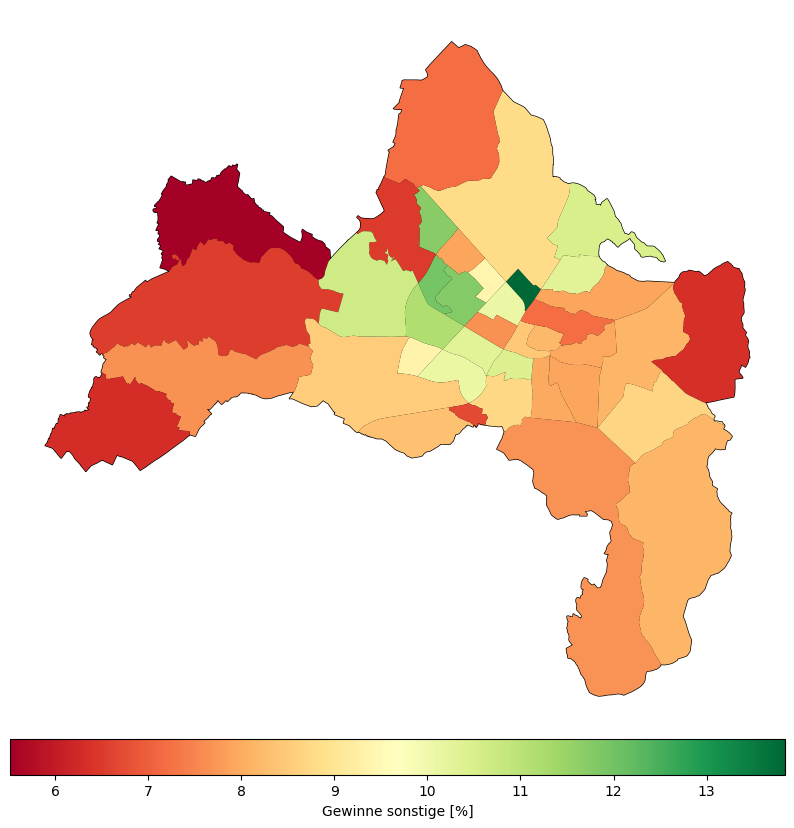

In [39]:
karte_stadtbezirke(joined,'Gewinne_sonstige',wahl='Europa')

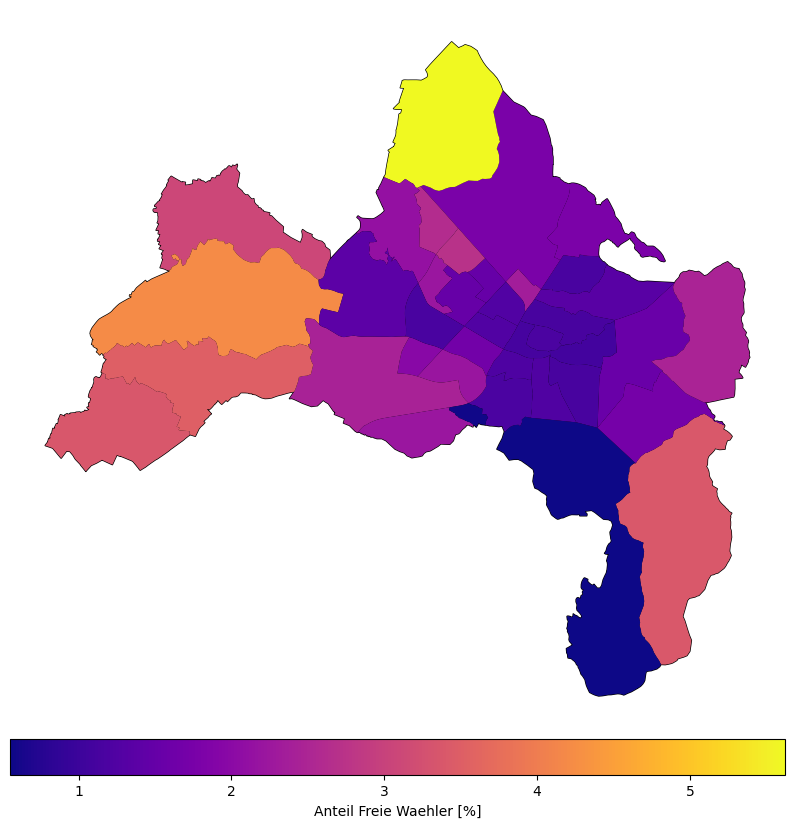

In [40]:
karte_stadtbezirke(joined,'FW',wahl='Europa')

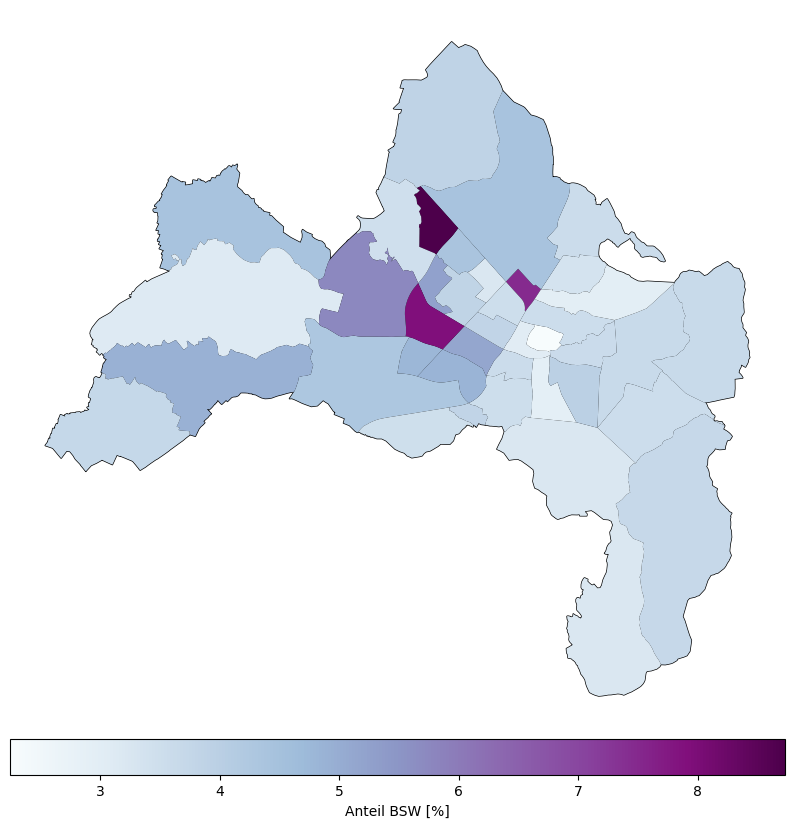

In [41]:
karte_stadtbezirke(joined,'BSW',wahl='Europa')

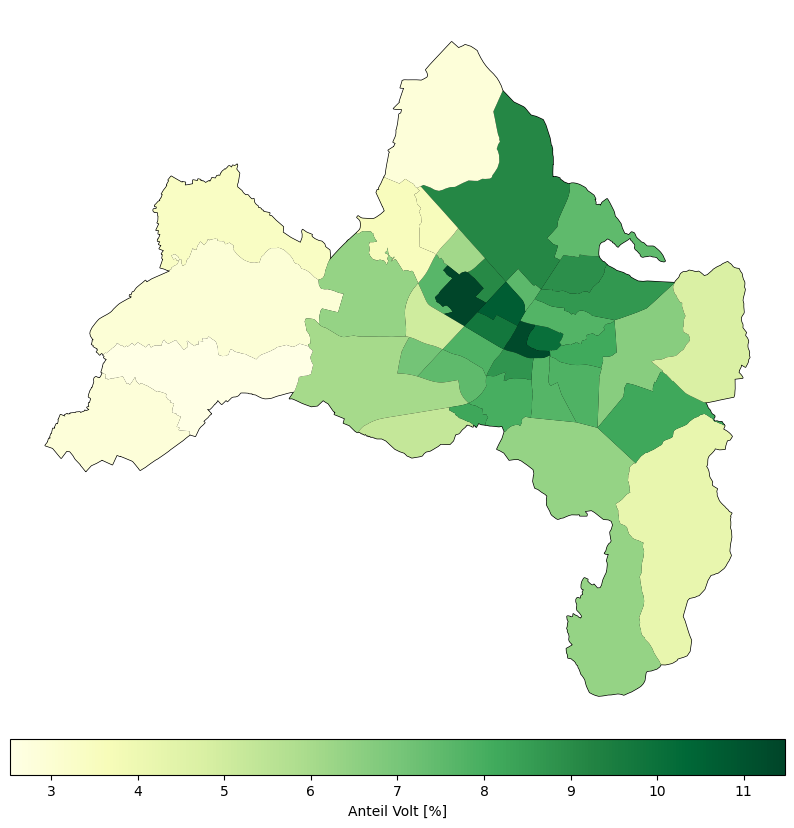

In [42]:
karte_stadtbezirke(joined,'Volt',wahl='Europa')

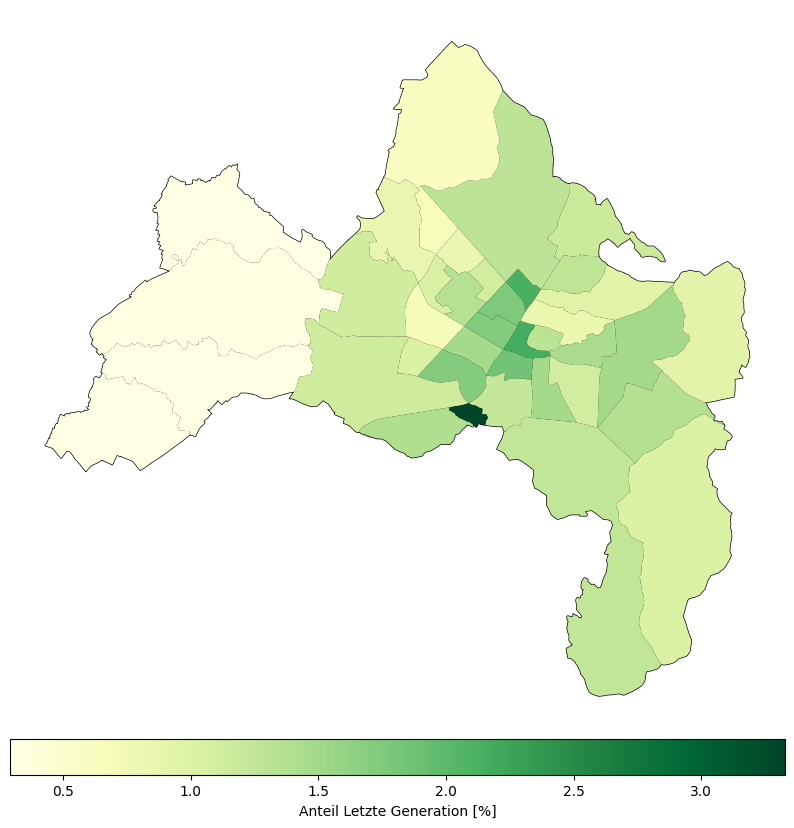

In [43]:
karte_stadtbezirke(joined,'Letzte_Generation',wahl='Europa')

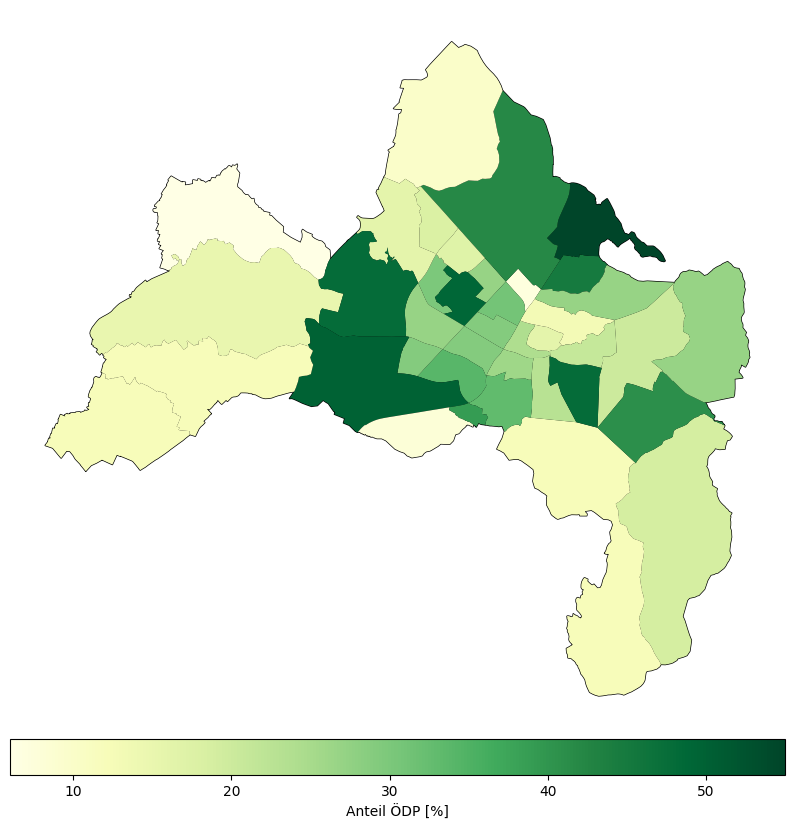

In [44]:
karte_stadtbezirke(joined,'ÖDP')

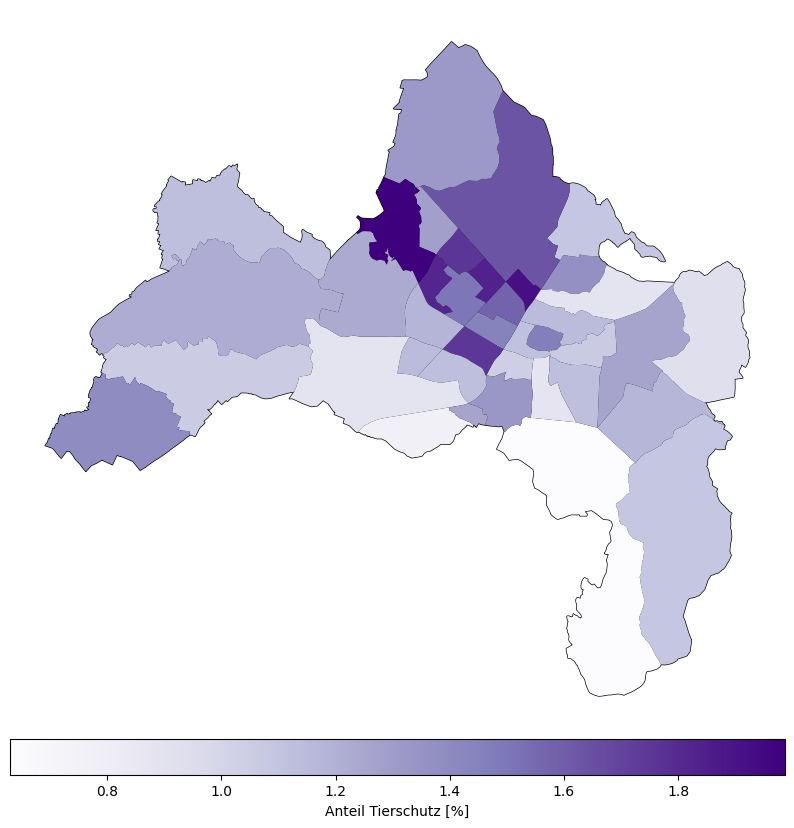

In [45]:
karte_stadtbezirke(joined,'Tierschutz',wahl='Europa')

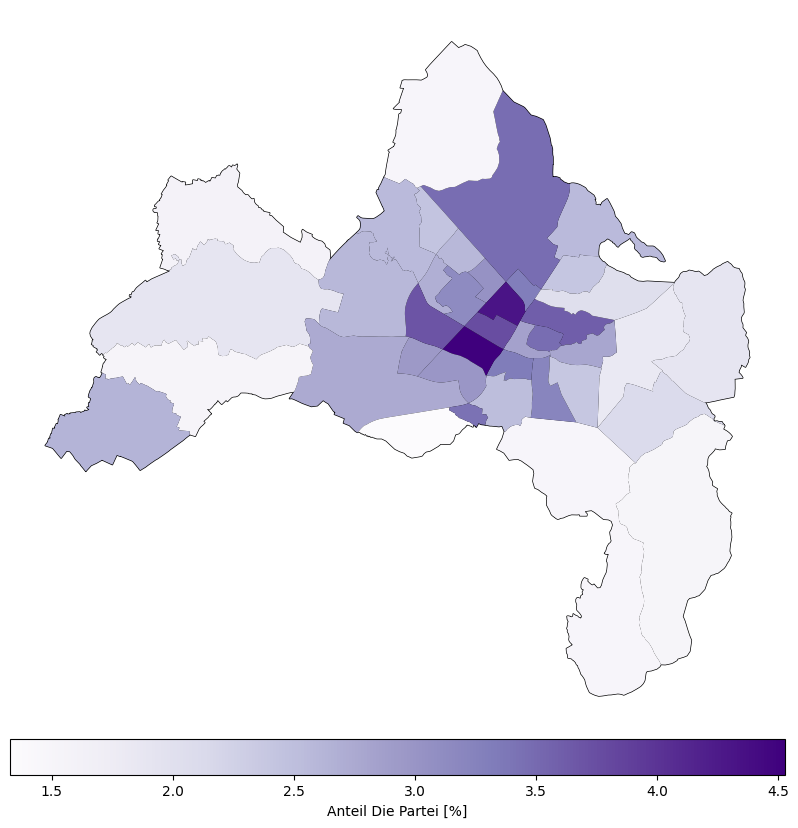

In [46]:
karte_stadtbezirke(joined,'DIE_PARTEI',wahl='Europa')

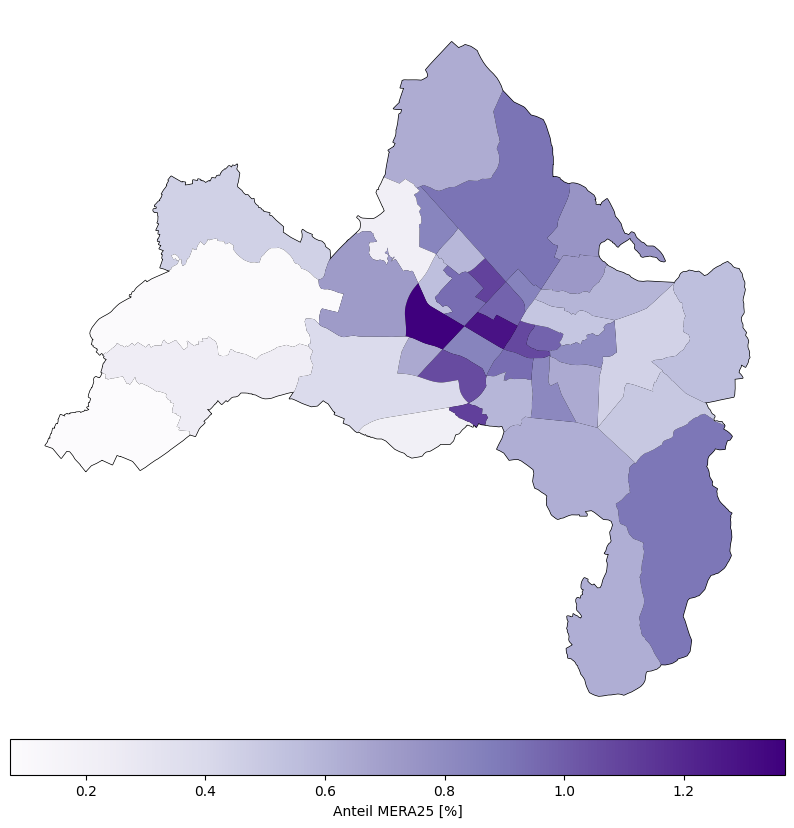

In [47]:
karte_stadtbezirke(joined,'MERA25',wahl='Europa')

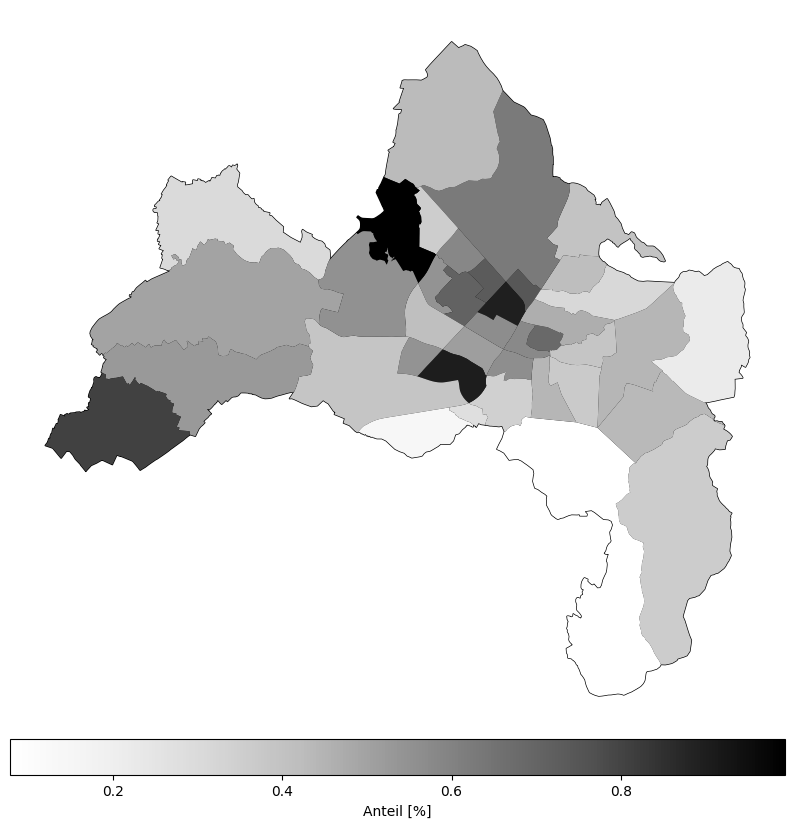

In [48]:
karte_stadtbezirke(joined,'PdF',wahl='Europa')

## Stadtbezirke Korrelation Parteien

In [50]:
wahl_bezirke['GRÜNE_prozent']=wahl_bezirke['GRÜNE']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['CDU_prozent']=wahl_bezirke['CDU']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['SPD_prozent']=wahl_bezirke['SPD']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['FDP_prozent']=wahl_bezirke['FDP']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['LINKE_prozent']=wahl_bezirke['LINKE']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['AfD_prozent']=wahl_bezirke['AfD']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['BSW_prozent']=wahl_bezirke['BSW']/wahl_bezirke['Gueltige_Stimmen']*100
wahl_bezirke['Volt_prozent']=wahl_bezirke['Volt']/wahl_bezirke['Gueltige_Stimmen']*100

In [53]:
corr_wahl=wahl_bezirke.loc[:,['GRÜNE_prozent','CDU_prozent','SPD_prozent','FDP_prozent','LINKE_prozent','AfD_prozent','BSW_prozent','Volt_prozent']].corr()

In [54]:
print(corr_wahl)

               GRÜNE_prozent  CDU_prozent  SPD_prozent  FDP_prozent  \
GRÜNE_prozent       1.000000    -0.565137    -0.456566     0.031579   
CDU_prozent        -0.565137     1.000000     0.374378     0.404311   
SPD_prozent        -0.456566     0.374378     1.000000     0.006228   
FDP_prozent         0.031579     0.404311     0.006228     1.000000   
LINKE_prozent       0.365559    -0.789885    -0.411380    -0.453126   
AfD_prozent        -0.783949     0.246253     0.201153    -0.306465   
BSW_prozent        -0.500525    -0.039833     0.051086    -0.355201   
Volt_prozent        0.443035    -0.668467    -0.414506    -0.137136   

               LINKE_prozent  AfD_prozent  BSW_prozent  Volt_prozent  
GRÜNE_prozent       0.365559    -0.783949    -0.500525      0.443035  
CDU_prozent        -0.789885     0.246253    -0.039833     -0.668467  
SPD_prozent        -0.411380     0.201153     0.051086     -0.414506  
FDP_prozent        -0.453126    -0.306465    -0.355201     -0.137136  
LINKE

Die Gruenenwahler verteilen sich aehnlich zu Volt und Linke Waehler.

CDU Waehler  verteilen sich aehnlich zu FDP und SPD Waehler. Eine kleinere Aehnlichkeit gibt es auch noch zur AfD, wie auch zwischen SPD und AfD. 

AfD und BSW Waehler verteilen sich am aehnlichsten von allen hier untersuchten groesseren Parteien. 